In [1]:
annotationDB = 1
probeDB = 2
alterSpliceDB = 3

# Set this to a large number (2**64) to 
geneNo = 2**64

# Mission Control

# Functions

ModuleNotFoundError: No module named 'fakeredis'

In [ ]:



def writePValues(probeset, pvalue):
    redisAlterSplice.zadd("probe$ASPvalue", pvalue, probeset)

In [1]:
initDB()
currentIter = transIter()
for _, i in zip(range(10), currentIter):
    print(i)

NameError: name 'initDB' is not defined

# Run AS-test for all transcription clusters at the "core" annotation level. Warning -- takes about 40 minutes.

In [133]:
from datetime import datetime
start = datetime.now()
for i, (trans, probesets) in enumerate(probesetIter(level="core")):
    for pvalue, probeset in geneLevelASPValues(trans, probesets = probesets):
        writePValues(probeset, pvalue)
    if i == geneNo:
        break
stop = datetime.now()
print(stop - start)

0:37:52.758483


In [ ]:
redisAlterSplice.zrange("probe$ASPvalue", 0, 10, withscores = True)

In [7]:
totalProbesets = redisAlterSplice.zcard("probe$ASPvalue")

In [8]:
print("total probesets analysed", totalProbesets)

total probesets analysed 284805


# Bonferroni adjusted p-values (below 0.05) and gene codes. Warning, some transcription clusters have more than one gene code assigned, and some have none, and transciption cluster ID is reported (I've got some other codes for these if you want, but they are a bit messy).

In [9]:
cutoff = 0.05
allOurGenes = set()
counter = 0

for probeset, pvalue in redisAlterSplice.zrange("probe$ASPvalue", 0, -1, withscores = True):
    bonferroniCorrected = pvalue * totalProbesets
    if bonferroniCorrected > cutoff:
        break
    transCluster = redisAnnot.smembers(b"search$probeset$" + probeset)
    transCluster = list(transCluster)
    assert(len(transCluster) == 1)
    transCluster = transCluster[0]
    usualName = redisAnnot.smembers(b"search$trans$usual$" + transCluster)
    if usualName:
        print(usualName, bonferroniCorrected)
    else:
        print(transCluster, bonferroniCorrected)
    allOurGenes.update(usualName)
    counter += 1

{b'ABLIM1'} 6.07741236575408e-09
{b'ARHGAP5'} 1.255317870617977e-08
{b'ARHGAP5'} 1.0607280736261399e-07
{b'ARHGAP5'} 3.344947436528069e-07
{b'RAPH1'} 3.4373923115678034e-07
{b'TBX3'} 6.455730098439337e-07
{b'ABLIM1'} 1.2759014224381996e-06
{b'ABLIM1'} 1.5343928553717703e-06
{b'ABLIM1'} 1.578298488250923e-06
{b'ABLIM1'} 1.6973569159799506e-06
{b'ABLIM1'} 1.8457533275742034e-06
{b'TBX3'} 4.978317758089931e-06
{b'ABLIM1'} 7.425109007338946e-06
{b'ARHGAP5'} 1.1919303981250213e-05
{b'ATP11B'} 1.3120205199518787e-05
{b'ABLIM1'} 1.320323495536537e-05
{b'ABLIM1'} 1.3237183489183327e-05
{b'PKP2'} 1.6232912842245562e-05
{b'ILF3'} 2.266536868252541e-05
{b'ABLIM1'} 2.3066606631094105e-05
{b'PKP2'} 2.6922352526687032e-05
{b'ABLIM1'} 5.106219942913326e-05
{b'ABLIM1'} 5.598769958366424e-05
{b'NAIP'} 6.361962074318137e-05
{b'PNN'} 7.018900616393465e-05
{b'ZNF254', b'LOC105372341'} 7.137898774591272e-05
{b'ABLIM1'} 7.625880038194142e-05
{b'LIMS1'} 8.105923230870413e-05
{b'RAPH1'} 9.594554079871635e-05


In [21]:
from collections import Counter
counterG = Counter()

for probeset, pvalue in redisAlterSplice.zrange("probe$ASPvalue", 0, -1, withscores = True):
    bonferroniCorrected = pvalue * totalProbesets
    if bonferroniCorrected > cutoff:
        break
    transCluster = redisAnnot.smembers(b"search$probeset$" + probeset)
    transCluster = list(transCluster)
    assert(len(transCluster) == 1)
    transCluster = transCluster[0]
    usualName = redisAnnot.smembers(b"search$trans$usual$" + transCluster)
    for name in usualName:
        counterG[name] += 1

In [23]:
counterG.most_common()

[(b'ABLIM1', 16),
 (b'CFHR3', 14),
 (b'CFHR4', 14),
 (b'SYNE1', 14),
 (b'CFHR1', 14),
 (b'TPTE2', 13),
 (b'NAIP', 12),
 (b'CBWD1', 12),
 (b'CBWD5', 10),
 (b'CBWD3', 10),
 (b'ANKRD12', 10),
 (b'ARHGAP5', 10),
 (b'CDC42BPB', 9),
 (b'ZNF93', 8),
 (b'ZNF90', 8),
 (b'BPTF', 8),
 (b'COL3A1', 8),
 (b'TET2', 8),
 (b'RAPH1', 8),
 (b'PKP2', 7),
 (b'BTF3P5', 7),
 (b'CCDC88A', 7),
 (b'WDR75', 7),
 (b'LOC105379525', 6),
 (b'ZDHHC2', 6),
 (b'CBWD6', 6),
 (b'CAPRIN2', 6),
 (b'TBX3', 6),
 (b'ZNF208', 6),
 (b'CBWD7', 6),
 (b'CFH', 6),
 (b'TM9SF2', 5),
 (b'GBP2', 5),
 (b'LOC105378843', 5),
 (b'MBD5', 5),
 (b'DLG1', 5),
 (b'ENPEP', 5),
 (b'GBP7', 5),
 (b'FAT4', 5),
 (b'PEG10', 5),
 (b'EEA1', 5),
 (b'DOCK9', 5),
 (b'LOC105377363', 5),
 (b'FOXD4L4', 4),
 (b'KIAA1033', 4),
 (b'POLR1D', 4),
 (b'ZNF714', 4),
 (b'PDZD11', 4),
 (b'DAPK1', 4),
 (b'VN1R79P', 4),
 (b'PAPOLA', 4),
 (b'ZNF415', 4),
 (b'LNPEP', 4),
 (b'ADRB2', 4),
 (b'ZNF728', 4),
 (b'KIAA0754', 4),
 (b'ZNF430', 4),
 (b'MAP3K7', 4),
 (b'NCK2', 4),
 (

In [24]:
print("total AS probesets", counter)
print("total AS genes with names", len(allOurGenes))

total AS probesets 740
total AS genes with names 434


In [25]:
nakamoriGenes = set()

with open("geneList") as f:
    for line in f:
        if not line:
            continue
        if line [0] == "#":
            continue
        gene = line.split(",")[0]
        nakamoriGenes.add(bytes(gene, encoding="ascii", errors="ignore"))

nakamoriNo = len(nakamoriGenes)
commonGenes = nakamoriGenes.intersection(allOurGenes)
agreedWith = len(commonGenes)

# Actin Cytoskeleton genes

In [26]:
actinCytoskeleton = set()
with open("actinCytoskeleton") as ac:
    for line in ac:
        actinCytoskeleton.add(bytes(line.rstrip(), encoding = "utf-8", errors="ignore"))

In [27]:
print("nakamori genes", nakamoriNo)
print("we agree with", agreedWith)

nakamori genes 39
we agree with 7


In [28]:
print("actin cytoskeleton genes", len(actinCytoskeleton))
commonAC = actinCytoskeleton.intersection(allOurGenes)
print("we agree with", len(commonAC))
commonAC

actin cytoskeleton genes 446
we agree with 12


{b'ABLIM1',
 b'ABLIM2',
 b'AKAP13',
 b'CDC42BPA',
 b'CDC42BPB',
 b'DAPK1',
 b'FHOD1',
 b'GBP2',
 b'INTS6',
 b'PPP1R12A',
 b'SEPT7',
 b'SORBS1'}

In [29]:
commonGenes

{b'CLCN1', b'FHOD1', b'LDB3', b'MBNL1', b'MBNL2', b'NFIX', b'TBC1D15'}

# Gene Expression Genes



In [12]:
geneExpression = set()
with open("geneExpression") as ge:
    for line in ge:
        for elem in line.rstrip().split():
            geneExpression.add(bytes(elem, encoding="ascii", errors="ignore"))

# P-value of the agreement we've got (us vs Nakamori)

In [246]:
[x, M, n, N] = [agreedWith - 1, 22011, nakamoriNo , len(allOurGenes)]
scipy.stats.hypergeom.sf(x, M, n, N)

9.8429962684363228e-06

# P-value of the agreement we've got (us vs actin cytoskeleton)

In [53]:
[x, M, n, N] = [len(commonAC) - 1, 22011, len(actinCytoskeleton) , len(allOurGenes)]
scipy.stats.hypergeom.sf(x, M, n, N)

0.6612824002895189

# P-value of the agreement we've got (us vs gene expression)

In [31]:
commonGE = allOurGenes.intersection(geneExpression)
print(len(allOurGenes))
print(len(geneExpression))
print(len(commonGE))
[x, M, n, N] = [len(commonGE) - 1, 22011, len(geneExpression) , len(allOurGenes)]
scipy.stats.hypergeom.sf(x, M, n, N)

434
877
35


6.7685817878196687e-05

In [34]:
for gene in commonGE:
    print(gene.decode(errors="ignore", encoding="ascii"), end=" ")

ZNF714 ZNF737 CHD9 ZNF468 ZNF28 ZNF75A ZNF92 ZNF254 ZNF493 TAF2 ZNF480 ZNF382 ZNF257 ZNF430 ZNF208 ZNF100 ZNF429 ZNF729 TP53BP2 KAT2A ZNF626 ZNF43 CCNH ZNF184 SESN3 NEDD4L SMAD2 ZNF676 ZNF415 ZNF347 ZNF433 ZNF492 ZNF600 ZNF665 ZNF99 

# That's a scratchpad

In [24]:
#redisAnnot.smembers(b"search$usual$" + b"CFHR1")

{b'2373406'}

In [ ]:
#for probeset in getProbesets(b'2373406'):
    #plotForProbeset(probeset)

In [ ]:
redisAnnot.smembers(b"search$we")    clusters = redisAnnot.smembers(b"search$usual$" + gene)
    return clusters

In [239]:
redisAnnot.smembers(b"search$probeset$" + b"3472764")

{b'3472755'}

In [240]:
redisAnnot.smembers(b"search$trans$usual$" + b"3472755")

{b'TBX3'}

In [103]:
geneLevelASPValues(b"2819436")[:10]

[(0.00041562012486095242, b'2819494'),
 (0.0021828956595993658, b'2819458'),
 (0.003582480912193391, b'2819485'),
 (0.0041452164336232365, b'2819455'),
 (0.0048907506421835764, b'2819498'),
 (0.056268964253086085, b'2819437'),
 (0.057284343321746929, b'2819454'),
 (0.057782232250982966, b'2819439'),
 (0.058209030196128761, b'2819475'),
 (0.070528704022002189, b'2819447')]

In [84]:
OneKTrans = []
OneK = 1000

for i, elem in enumerate(transIter()):
    if i < OneK:
        OneKTrans.append(elem)
    if i == OneK:
        break


In [85]:
totalProbesets = 284805

In [ ]:
def geneLevelBF(clusters, customMA = None):
    for cluster in clusters:
        pValues = geneLevelASPValues(cluster, customMA=customMA)
        for pValueTupla in pValues:
            yield pValueTupla

def geneLevelBFRandomised(clusters):
    customMA = modalAllele[:]
    random.shuffle(customMA)
    return geneLevelBF(clusters, customMA)

In [ ]:
OneHToPlot = list(geneLevelBF(OneHTrans))
OneHToPlotR = list(geneLevelBFRandomised(OneHTrans))

In [ ]:
OneKToPlot = list(geneLevelBF(OneKTrans))
OneKToPlotR = list(geneLevelBFRandomised(OneKTrans))

In [ ]:
OneHToPlot.sort()
OneKToPlot.sort()
OneHToPlotR.sort()
OneKToPlotR.sort()

In [ ]:
fig = plt.hist([p for p, s in OneKToPlotR], bins=100)

In [ ]:
fig = plt.hist([p for p, s in OneKToPlot],bins=100)

In [ ]:
OneKToPlot[:20]

In [ ]:
OneKToPlotR[:20]

In [ ]:
print(sorted(geneLevelASPValues(b"4095408")))

(array([ 13.,  12.,   8.,   9.,   9.,  17.,   6.,   8.,  13.,   8.]),
 array([ 0.0030396 ,  0.13475215,  0.26646469,  0.39817724,  0.52988979,
         0.66160234,  0.79331488,  0.92502743,  1.05673998,  1.18845253,
         1.32016507]),
 <a list of 10 Patch objects>)

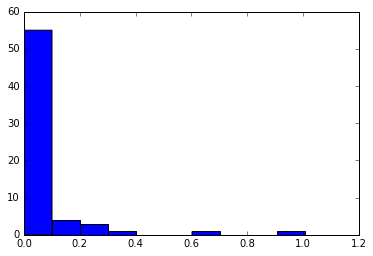

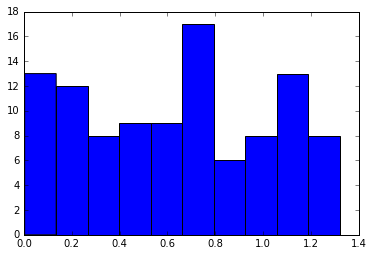

In [35]:
# That's for MBNL1
plt.hist([pValue for pValue, probeset in geneLevelASPValues(b"2648141")])
plt.figure()
# That's for FOXP2
plt.hist([pValue for pValue, probeset in geneLevelASPValues(b"3019793")])
# print(sorted([pValue for pValue, probeset in geneLevelASPValues(b"3019793")]))

In [ ]:
probeset = b"2492472"
plotForProbeset(probeset)

In [ ]:
gene = b"FOXP2"
clusterProbes = {}
for cluster in getClusters(gene):
    clusterProbes[cluster] = getProbesets(cluster)
print(getProbesets(b"3019793"))

In [ ]:
redisProbe.smembers(b"trans$probeset$2648141")

In [ ]:
probeset = b"3178469"
plotForProbeset(probeset)

In [ ]:
import json
probeset = b'2315105'
metadataKeys = json.loads(redisAnnot.get(b'main$metadataKeys').decode("ascii", errors="ignore"))
metadataToIndex = {key:i for i, key in enumerate(metadataKeys)}

checkProbesetLevel(probeset) == "extended"

In [33]:
productCDF(0.00003**4, 4)

1.0496366993128806e-14

In [35]:
0.00003 * totalProbesets

8.54415

probeset b'3307988'
p-value for probeset 0.0733610375116
p-value without AS 0.171007634498
seqInv: ATGAAGAACGCCGAATGTTTGGCAG
seqInv: AAAGAAATCGGATGAAGAACGCCGA
seqInv: CTGTGCGTCGAATCAGACTTTTGGA
seqInv: TGCAGAGACGGAGACCGTCCTGTGC


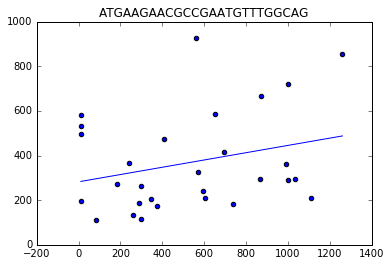

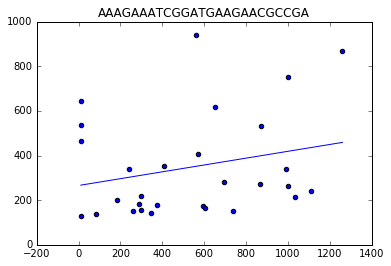

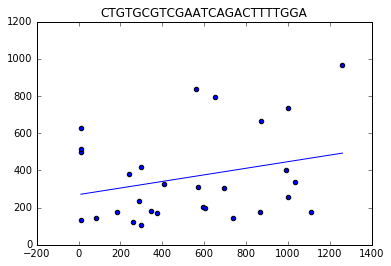

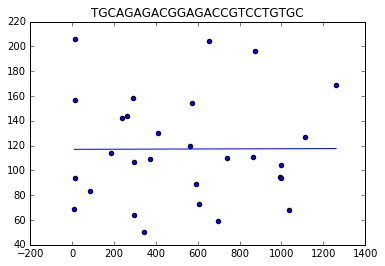

In [36]:
plotForProbeset(b"3307988")

GSE 47968

1. Do analysis. Same list of genes.
2. Produce a longer list, more genes over significant. More power.
3. 

1. Hypergeometric test to check overlap.

Good picture for Simon

In [ ]:
Look at 

In [37]:
redisAnnot.smembers(b"search$usual$" + b"FOXP2")

{b'3019793', b'3019905', b'3019939'}

In [28]:
redisAnnot.hget(b"probeset$metadata", b"2373446")

b'[2373446, "chr1", "+", 196826899, 196826928, 4, 2373406, 35865, 48061, "full"]'

In [1]:
getClusters("CFHR1")

NameError: name 'getClusters' is not defined

In [37]:
getClusters(b"CELF1")

{b'3372253'}

In [43]:
pValues = []
for probeset in getProbesets(b"3372253"):
    d, m = dataForProbeset(probeset)
    pValue = pValueForProbeset(modalAllele, d)
    pValues.append(pValue)

In [45]:
pValues.sort()

In [46]:
pValues

[9.2546834308971049e-05,
 0.00059896803441079969,
 0.00077523321211885325,
 0.0016010320055655765,
 0.0016605692984258524,
 0.0022402545573140713,
 0.0039550035941132025,
 0.0048870716994369101,
 0.0052685185849972059,
 0.0055392921854573018,
 0.0068765524497390483,
 0.0073110986341712331,
 0.0093219741669544921,
 0.012125744693874802,
 0.020974868414800344,
 0.023629072708958716,
 0.034776064972214783,
 0.034891909696939408,
 0.061371510757053903,
 0.064194980570995958,
 0.069723777110835217,
 0.073506048884514799,
 0.084879528067204321,
 0.14877593015278071,
 0.27220754294267846,
 0.28265119821450735,
 0.40323411909935136,
 0.43006009170577558,
 0.48611186357689906,
 0.49440710985442815,
 0.61368036714305896,
 0.65717508799890856,
 0.70023435541436374,
 0.71719005288632309,
 0.7888111979166782,
 0.80061769117271464,
 0.92136217717605584,
 1.0733272140501318,
 1.2423396065428194]